# Generate a plot of multiple SEDs

In [1]:
import os, glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def row_to_val(row, key='Flux Density'):
    if '<' in row[key]:
        return float(row[key].replace(' ','')[1:])
    return float(row[key].split('+')[0])

def row_to_err(row, key='Flux Density'):
    if '<' in row[key]:
        return 0
    return float(row[key].split('-')[-1])

def is_upperlimit(row, key='Flux Density'):
    if '<' in row[key]:
        return True
    return False

def get_facility(row):
    if '-' in row['Array Configuration']:
        return 'ALMA'
    return 'VLA'

def label(row, obj_name):
    # if row.t < 100: # if the time is less than 100 days
    #     # this is an "early time" observation
    #     return obj_name+r' ($\Delta t < 100$ days)'
    return obj_name#+r' ($\Delta t > 100$ days)'

In [3]:
# First Sw J1644+57
SwJ1644_files = glob.glob('SwJ1644+57*')

allswfiles = []
cite_map = {'Berger2012':'Berger et al. (2012)',
            'Zauderer2013': 'Zauderer et al. (2013)',
            'Eftekhari2018': 'Eftekhari et al. (2018)'}
for f in SwJ1644_files:
    df = pd.read_csv(f, sep='\t') 
    for c in cite_map.keys():
        if c in f:
            df['Citation'] = [cite_map[c]]*len(df)
            continue

    allswfiles.append(df)
    
SwJ1644_data = pd.concat(allswfiles)
SwJ1644_data.Facility = SwJ1644_data.Facility.fillna('VLA') # all of these observations were with the VLA

# clean the data
del SwJ1644_data['Unnamed: 4']
del SwJ1644_data['Unnamed: 3']
SwJ1644_data = SwJ1644_data.drop(0)

SwJ1644_data['FluxDensity'] = SwJ1644_data.apply(row_to_val, axis=1)
SwJ1644_data['FluxDensityErr'] = SwJ1644_data.apply(row_to_err, axis=1)

del SwJ1644_data['Flux Density']

SwJ1644_data.Frequency = SwJ1644_data.Frequency.astype(float)
SwJ1644_data.t = SwJ1644_data.t.astype(float)


ts = SwJ1644_data.t.unique()
m, M = int(ts.min()), int(ts.max())

vals = np.logspace(np.log10(m),np.log10(M), 11, dtype=int)
SwJ1644_data['TimeGroup'] = np.zeros(len(SwJ1644_data))
SwJ1644_data['Object'] = SwJ1644_data.apply(label, obj_name='Sw J1644+57', axis=1)
for idx, row in SwJ1644_data.iterrows():
    
    for val_min, val_max in zip(vals[:-1], vals[1:]):
        if row.t >= val_min and row.t <= val_max:
            SwJ1644_data.TimeGroup[idx] = f'{val_min}-{val_max} days'
            break
            
SwJ1644_data['t'] = SwJ1644_data.t.astype(float)
SwJ1644_data

/tmp/ipykernel_2206944/2284446150.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SwJ1644_data.TimeGroup[idx] = f'{val_min}-{val_max} days'


,t,Facility,Frequency,Citation,FluxDensity,FluxDensityErr,TimeGroup,Object
1,244.23,JVLA,1.8,Zauderer et al. (2013),2.29,0.08,5-10 days,Sw J1644+57
2,271.95,JVLA,1.8,Zauderer et al. (2013),2.02,0.23,75-143 days,Sw J1644+57
3,383.92,JVLA,1.8,Zauderer et al. (2013),4.37,0.10,143-273 days,Sw J1644+57
4,452.66,JVLA,1.8,Zauderer et al. (2013),3.77,0.09,143-273 days,Sw J1644+57
5,581.31,JVLA,1.8,Zauderer et al. (2013),2.88,0.08,3-5 days,Sw J1644+57
...,...,...,...,...,...,...,...,...
249,18.25,SMA,230.0,Berger et al. (2012),9.90,1.40,10-20 days,Sw J1644+57
250,20.24,SMA,230.0,Berger et al. (2012),8.20,1.40,20-39 days,Sw J1644+57
251,21.25,SMA,230.0,Berger et al. (2012),8.30,2.20,20-39 days,Sw J1644+57
252,125.05,SMA,230.0,Berger et al. (2012),6.10,0.65,75-143 days,Sw J1644+57


In [4]:
# Now AT2019dsg
dsg = pd.read_csv('AT2019dsg_Cendes2021.txt', sep=',')

dsg['FluxDensity'] = dsg.apply(row_to_val, axis=1)
dsg['FluxDensityErr'] = dsg.apply(row_to_err, axis=1)
dsg['Upperlimit'] = dsg.apply(is_upperlimit, axis=1)
dsg['Facility'] = dsg.apply(get_facility, axis=1)
dsg['Object'] = dsg.apply(label, obj_name='AT2019dsg', axis=1)

dsg['t'] = dsg.t.astype(float) 
dsg['Citation'] = ['Cendes et al. (2021)']*len(dsg)

dsg

,Date,t,Array Configuration,Frequency,Flux Density,FluxDensity,FluxDensityErr,Upperlimit,Facility,Object,Citation
0,2019 May 24,55.0,B,5.0,0.09 +or- 0.01,0.09,0.01,False,VLA,AT2019dsg,Cendes et al. (2021)
1,2019 May 24,55.0,B,7.0,0.19 +or- 0.01,0.19,0.01,False,VLA,AT2019dsg,Cendes et al. (2021)
2,2019 May 24,55.0,B,13.0,0.48 +or- 0.02,0.48,0.02,False,VLA,AT2019dsg,Cendes et al. (2021)
3,2019 May 24,55.0,B,15.0,0.54 +or- 0.02,0.54,0.02,False,VLA,AT2019dsg,Cendes et al. (2021)
4,2019 May 24,55.0,B,17.0,0.58 +or- 0.02,0.58,0.02,False,VLA,AT2019dsg,Cendes et al. (2021)
...,...,...,...,...,...,...,...,...,...,...,...
57,2020 Jan 24,300.0,D,17.0,0.23 +or- 0.03,0.23,0.03,False,VLA,AT2019dsg,Cendes et al. (2021)
58,2020 Oct 11,561.0,B,1.5,0.35 +or- 0.05,0.35,0.05,False,VLA,AT2019dsg,Cendes et al. (2021)
59,2020 Oct 11,561.0,B,2.6,0.26 +or- 0.02,0.26,0.02,False,VLA,AT2019dsg,Cendes et al. (2021)
60,2020 Oct 11,561.0,B,3.4,0.17 +or- 0.01,0.17,0.01,False,VLA,AT2019dsg,Cendes et al. (2021)


In [5]:
# AT2022cmc

cmc = pd.read_csv('AT2022cmc_Andreoni2022.txt', sep='&')

cmc = cmc.drop(0)
print(cmc[' nu '])
cmc['Frequency'] = cmc[' nu '].astype(float)#
cmc['t'] = cmc[' Delta t '].astype(float)
cmc['FluxDensity'] = cmc.apply(row_to_val, key=' F_nu ', axis=1).astype(float)*1e-3 # convert from uJy to mJy
cmc['FluxDensityErr'] = cmc['  RMS'].astype(float)*1e-3
cmc['Object'] = cmc.apply(label, obj_name='AT2022cmc', axis=1)
cmc['Citation'] = ['Andreoni et al. (2022)']*len(cmc)

cmc

1        8.5
2        9.5
3       10.5
4       11.5
5        8.5
       ...  
121     11.5
122     12.8
123     14.3
124     15.9
125     17.4
Name:  nu , Length: 125, dtype: object


,#Facility,UT date,Delta t,nu,F_nu,RMS,Frequency,t,FluxDensity,FluxDensityErr,Object,Citation
1,VLA,2022-02-15 12:30,4.07,8.5,33,7,8.5,4.07,0.033,0.007,AT2022cmc,Andreoni et al. (2022)
2,VLA,2022-02-15 12:30,4.07,9.5,46,7,9.5,4.07,0.046,0.007,AT2022cmc,Andreoni et al. (2022)
3,VLA,2022-02-15 12:30,4.07,10.5,51,8,10.5,4.07,0.051,0.008,AT2022cmc,Andreoni et al. (2022)
4,VLA,2022-02-15 12:30,4.07,11.5,68,9,11.5,4.07,0.068,0.009,AT2022cmc,Andreoni et al. (2022)
5,VLA,2022-02-16 12:19,5.07,8.5,43,8,8.5,5.07,0.043,0.008,AT2022cmc,Andreoni et al. (2022)
...,...,...,...,...,...,...,...,...,...,...,...,...
121,VLA,2022-03-31 04:13,47.73,11.5,438,14,11.5,47.73,0.438,0.014,AT2022cmc,Andreoni et al. (2022)
122,VLA,2022-03-31 04:23,47.74,12.8,583,12,12.8,47.74,0.583,0.012,AT2022cmc,Andreoni et al. (2022)
123,VLA,2022-03-31 04:23,47.74,14.3,724,12,14.3,47.74,0.724,0.012,AT2022cmc,Andreoni et al. (2022)
124,VLA,2022-03-31 04:23,47.74,15.9,801,14,15.9,47.74,0.801,0.014,AT2022cmc,Andreoni et al. (2022)


# Merge all the data and plot it

In [6]:
def sefd(nu, min_rms=1e-6, npol=1, dt=3600): 
    # from https://leo.phys.unm.edu/~lwa/obsstatus/obsstatus006.html
    return min_rms*np.sqrt(2*npol*nu*dt)*1e3 # calculate and convert from Jy -> mJy

In [7]:
data = pd.concat([SwJ1644_data, dsg, cmc])
data

,t,Facility,Frequency,Citation,FluxDensity,FluxDensityErr,TimeGroup,Object,Date,Array Configuration,Flux Density,Upperlimit,#Facility,UT date,Delta t,nu,F_nu,RMS
1,244.23,JVLA,1.8,Zauderer et al. (2013),2.290,0.080,5-10 days,Sw J1644+57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,271.95,JVLA,1.8,Zauderer et al. (2013),2.020,0.230,75-143 days,Sw J1644+57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,383.92,JVLA,1.8,Zauderer et al. (2013),4.370,0.100,143-273 days,Sw J1644+57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,452.66,JVLA,1.8,Zauderer et al. (2013),3.770,0.090,143-273 days,Sw J1644+57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,581.31,JVLA,1.8,Zauderer et al. (2013),2.880,0.080,3-5 days,Sw J1644+57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,47.73,NaN,11.5,Andreoni et al. (2022),0.438,0.014,NaN,AT2022cmc,NaN,NaN,NaN,NaN,VLA,2022-03-31 04:13,47.73,11.5,438,14
122,47.74,NaN,12.8,Andreoni et al. (2022),0.583,0.012,NaN,AT2022cmc,NaN,NaN,NaN,NaN,VLA,2022-03-31 04:23,47.74,12.8,583,12
123,47.74,NaN,14.3,Andreoni et al. (2022),0.724,0.012,NaN,AT2022cmc,NaN,NaN,NaN,NaN,VLA,2022-03-31 04:23,47.74,14.3,724,12
124,47.74,NaN,15.9,Andreoni et al. (2022),0.801,0.014,NaN,AT2022cmc,NaN,NaN,NaN,NaN,VLA,2022-03-31 04:23,47.74,15.9,801,14


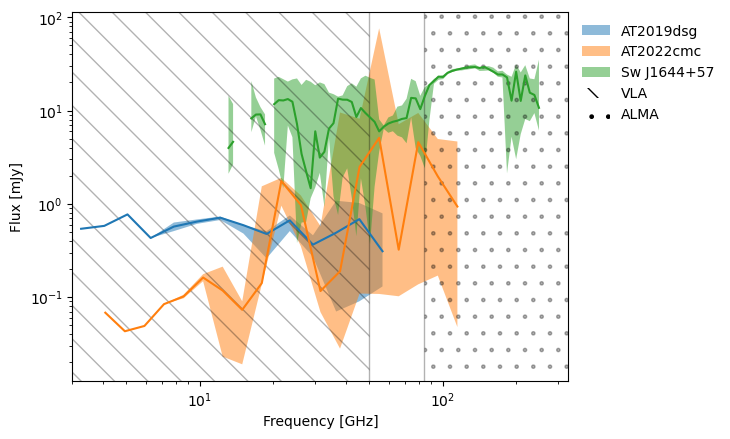

In [8]:
fig, ax = plt.subplots()
bin_factor = 3

VLA_nus = np.linspace(0.11,50) #GHz
ALMA_nus = np.linspace(84, 950) # GHz

for lab, grp in data.groupby('Object'):
    nbins = len(grp)//bin_factor
    bins = np.logspace(np.log10(grp.Frequency.min()), np.log10(grp.Frequency.max()), nbins)
    grp['range'] = pd.cut(grp.index, 
                          bins, 
                          retbins=False)
    avgs = grp.groupby('range').FluxDensity.agg(['min', 'max', 'median'])
    bincenter = list(avgs.index.map(lambda interval: (interval.left+interval.right)/2))
    
    # plot a 2 std region
    ax.fill_between(bincenter, avgs['min'], avgs['max'], alpha=0.5, label=lab)
    ax.plot(bincenter, avgs['median'])

ax.set_xscale('log')
ax.set_yscale('log')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
    
ax.fill_between(VLA_nus, [1e-50]*len(VLA_nus), [1000]*len(VLA_nus), label='VLA', alpha=0.3, facecolor="none", hatch="\\")
ax.fill_between(ALMA_nus, [1e-50]*len(ALMA_nus), [1000]*len(ALMA_nus), label='ALMA', alpha=0.3, facecolor="none", hatch=".",)

ax.set_ylim(*ylim)
ax.set_xlim(3, xlim[1])
ax.set_ylabel('Flux [mJy]')
ax.set_xlabel('Frequency [GHz]')
ax.legend(bbox_to_anchor=(1.32, 1), frameon=False,)

fig.savefig('SEFD-plot.png', transparent=False, bbox_inches='tight')

In [9]:
data

,t,Facility,Frequency,Citation,FluxDensity,FluxDensityErr,TimeGroup,Object,Date,Array Configuration,Flux Density,Upperlimit,#Facility,UT date,Delta t,nu,F_nu,RMS
1,244.23,JVLA,1.8,Zauderer et al. (2013),2.290,0.080,5-10 days,Sw J1644+57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,271.95,JVLA,1.8,Zauderer et al. (2013),2.020,0.230,75-143 days,Sw J1644+57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,383.92,JVLA,1.8,Zauderer et al. (2013),4.370,0.100,143-273 days,Sw J1644+57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,452.66,JVLA,1.8,Zauderer et al. (2013),3.770,0.090,143-273 days,Sw J1644+57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,581.31,JVLA,1.8,Zauderer et al. (2013),2.880,0.080,3-5 days,Sw J1644+57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,47.73,NaN,11.5,Andreoni et al. (2022),0.438,0.014,NaN,AT2022cmc,NaN,NaN,NaN,NaN,VLA,2022-03-31 04:13,47.73,11.5,438,14
122,47.74,NaN,12.8,Andreoni et al. (2022),0.583,0.012,NaN,AT2022cmc,NaN,NaN,NaN,NaN,VLA,2022-03-31 04:23,47.74,12.8,583,12
123,47.74,NaN,14.3,Andreoni et al. (2022),0.724,0.012,NaN,AT2022cmc,NaN,NaN,NaN,NaN,VLA,2022-03-31 04:23,47.74,14.3,724,12
124,47.74,NaN,15.9,Andreoni et al. (2022),0.801,0.014,NaN,AT2022cmc,NaN,NaN,NaN,NaN,VLA,2022-03-31 04:23,47.74,15.9,801,14


# Model the SEDs

Index(['t', 'Facility', 'Frequency', 'Citation', 'FluxDensity',
       'FluxDensityErr', 'TimeGroup', 'Object', 'Date', 'Array Configuration',
       'Flux Density', 'Upperlimit', '#Facility ', ' UT date ', ' Delta t ',
       ' nu ', ' F_nu ', '  RMS', 't_days'],
      dtype='object')


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 54.29it/s]


Best fit values for day:  None
\mathrm{F_nu} = 3.76e-01_{-0.351}^{4.809}
\mathrm{nu_a} = 8.13e+10_{-80733827263.290}^{12891655403.951}


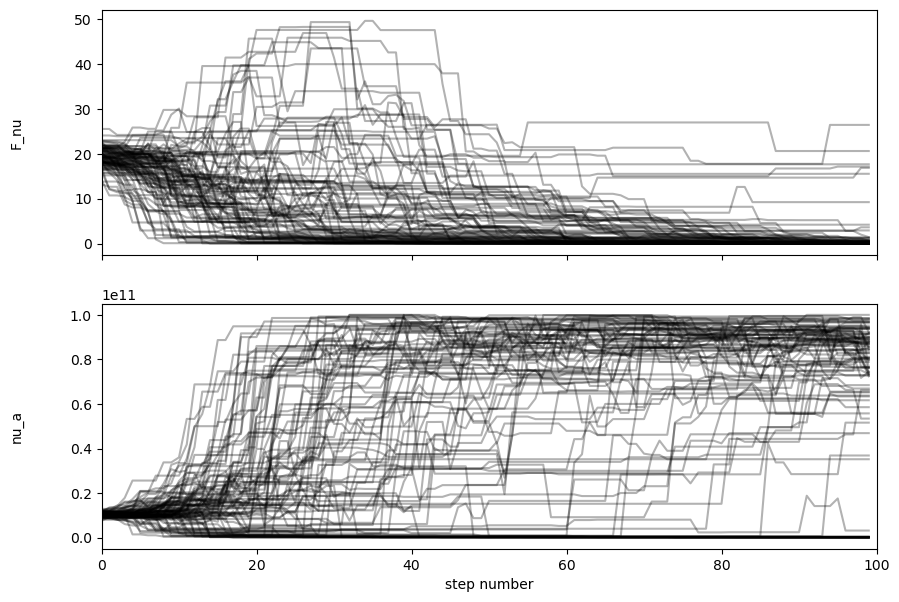

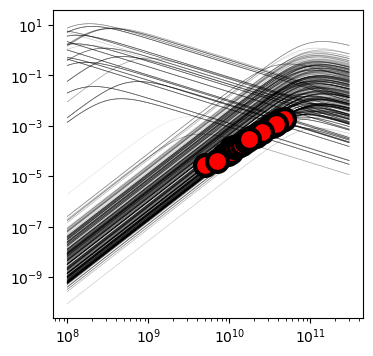

In [10]:
import syncfit
data['t_days'] = data.t.astype(int)
for lab, grp in data.groupby(['Citation', 't_days']):
    citation, epoch = lab
    if len(grp) < 20: continue
    print(grp.keys())
    out = syncfit.mcmc.do_emcee([20, 1e10], grp[' nu '].astype(float), grp.FluxDensity, grp.FluxDensityErr, plot=True, niter=100)
    break

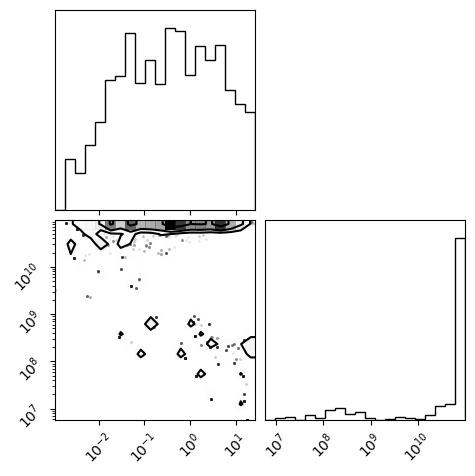

In [11]:
from corner import corner
corner(out, axes_scale='log');

In [12]:
dsg

,Date,t,Array Configuration,Frequency,Flux Density,FluxDensity,FluxDensityErr,Upperlimit,Facility,Object,Citation
0,2019 May 24,55.0,B,5.0,0.09 +or- 0.01,0.09,0.01,False,VLA,AT2019dsg,Cendes et al. (2021)
1,2019 May 24,55.0,B,7.0,0.19 +or- 0.01,0.19,0.01,False,VLA,AT2019dsg,Cendes et al. (2021)
2,2019 May 24,55.0,B,13.0,0.48 +or- 0.02,0.48,0.02,False,VLA,AT2019dsg,Cendes et al. (2021)
3,2019 May 24,55.0,B,15.0,0.54 +or- 0.02,0.54,0.02,False,VLA,AT2019dsg,Cendes et al. (2021)
4,2019 May 24,55.0,B,17.0,0.58 +or- 0.02,0.58,0.02,False,VLA,AT2019dsg,Cendes et al. (2021)
...,...,...,...,...,...,...,...,...,...,...,...
57,2020 Jan 24,300.0,D,17.0,0.23 +or- 0.03,0.23,0.03,False,VLA,AT2019dsg,Cendes et al. (2021)
58,2020 Oct 11,561.0,B,1.5,0.35 +or- 0.05,0.35,0.05,False,VLA,AT2019dsg,Cendes et al. (2021)
59,2020 Oct 11,561.0,B,2.6,0.26 +or- 0.02,0.26,0.02,False,VLA,AT2019dsg,Cendes et al. (2021)
60,2020 Oct 11,561.0,B,3.4,0.17 +or- 0.01,0.17,0.01,False,VLA,AT2019dsg,Cendes et al. (2021)


### Let's do all the objects separately

In [13]:
import syncfit
def model_from_df(indf, n=2000, p=3, ax=None, plt_data=True, **kwargs):
    
    out = syncfit.mcmc.do_emcee([20, 1e10], indf.Frequency.astype(float), indf.FluxDensity, indf.FluxDensityErr, plot=False, niter=n)
    
    # get the medians of the output and plot that with the model
    model = syncfit.single_break_model.SED
    nus = np.arange(1e8,5e12,1e7)
    
    lower, medians, upper = np.percentile(out, [16, 50, 84], axis=0)
    print(medians, lower, upper)
    
    median_fit = model(nus, p, *medians)
    lower_fit = model(nus, p, *lower)
    upper_fit = model(nus, p, *upper)
    
    if ax is None:
        fig, ax = plt.subplots()
        
    p = ax.plot(nus, median_fit, **kwargs)
    #ax.fill_between(nus, lower_fit, upper_fit, alpha=1, color='r')
    if plt_data:
        ax.errorbar(indf.Frequency.astype(float)*1e9, indf.FluxDensity*1e-3, 
                    yerr=indf.FluxDensityErr*1e-3, fmt='o', linestyle='none',
                    markersize=8, capsize=5, alpha=0.2, color=p[-1].get_color())
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylabel('Flux Density [Jy]')
    ax.set_xlabel('Frequency [Hz]')
    
def plot_all_seds(df, bounds, ax=None, exact_bounds=False, **kwargs):
    if ax is None:
        fig, ax = plt.subplots()
    
    if exact_bounds:
        r = len(bounds)
    else:
        r = len(bounds)-1
    for i in range(r):
        if exact_bounds:
            where = np.where(df.t == bounds[i])
            lab = f'{bounds[i]} days'
        else:
            where = np.where((df.t >= bounds[i]) * (df.t < bounds[i+1]))
            lab = f'{bounds[i]} to {bounds[i+1]} days'
        indf = df.iloc[where]
        if len(indf) == 0: continue
        model_from_df(indf, ax=ax, label=lab, **kwargs)
    
    ax.legend()
    
    VLA_nus = np.linspace(0.11,50) #GHz
    ALMA_nus = np.linspace(84, 950) # GHz
    ax.fill_between(VLA_nus*1e9, [1e-50]*len(VLA_nus), [1000]*len(VLA_nus), label='VLA', alpha=0.3, facecolor="none", hatch="x")
    ax.fill_between(ALMA_nus*1e9, [1e-50]*len(ALMA_nus), [1000]*len(ALMA_nus), label='ALMA', alpha=0.3, facecolor="none", hatch="|",)

### AT2022cmc

In [22]:
cmc

,#Facility,UT date,Delta t,nu,F_nu,RMS,Frequency,t,FluxDensity,FluxDensityErr,Object,Citation
1,VLA,2022-02-15 12:30,4.07,8.5,33,7,8.5,4.07,0.033,0.007,AT2022cmc,Andreoni et al. (2022)
2,VLA,2022-02-15 12:30,4.07,9.5,46,7,9.5,4.07,0.046,0.007,AT2022cmc,Andreoni et al. (2022)
3,VLA,2022-02-15 12:30,4.07,10.5,51,8,10.5,4.07,0.051,0.008,AT2022cmc,Andreoni et al. (2022)
4,VLA,2022-02-15 12:30,4.07,11.5,68,9,11.5,4.07,0.068,0.009,AT2022cmc,Andreoni et al. (2022)
5,VLA,2022-02-16 12:19,5.07,8.5,43,8,8.5,5.07,0.043,0.008,AT2022cmc,Andreoni et al. (2022)
...,...,...,...,...,...,...,...,...,...,...,...,...
121,VLA,2022-03-31 04:13,47.73,11.5,438,14,11.5,47.73,0.438,0.014,AT2022cmc,Andreoni et al. (2022)
122,VLA,2022-03-31 04:23,47.74,12.8,583,12,12.8,47.74,0.583,0.012,AT2022cmc,Andreoni et al. (2022)
123,VLA,2022-03-31 04:23,47.74,14.3,724,12,14.3,47.74,0.724,0.012,AT2022cmc,Andreoni et al. (2022)
124,VLA,2022-03-31 04:23,47.74,15.9,801,14,15.9,47.74,0.801,0.014,AT2022cmc,Andreoni et al. (2022)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:41<00:00, 48.14it/s]


[9.74861848e-03 7.96949949e+10] [4.22557687e-03 5.03235721e+10] [1.44153111e-02 9.46888636e+10]


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:41<00:00, 48.30it/s]


[7.70452686e-03 6.41687506e+10] [2.58257877e-03 3.79491919e+10] [1.61312514e-02 9.06043150e+10]


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:43<00:00, 45.64it/s]


[5.01655185e-03 5.30453162e+10] [4.80867660e-03 4.13887798e+10] [5.58143475e-03 5.43538243e+10]


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:43<00:00, 45.53it/s]


[1.21258220e-02 5.87405322e+10] [1.19671773e-02 4.45785308e+07] [3.64432312e-02 6.05207920e+10]


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:48<00:00, 41.47it/s]


[3.03591051e-02 8.06226148e+10] [2.87649116e-02 7.80139984e+10] [3.20711289e-02 8.28297223e+10]


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:43<00:00, 46.04it/s]


[2.02553294e-02 8.83453118e+10] [2.01351563e-02 9.10514198e+07] [2.78665806e-02 8.88785304e+10]


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:32<00:00, 61.63it/s]


[1.29480371e+00 6.00302285e+08] [6.50834988e-02 4.33495402e+07] [1.77954956e+01 1.18801581e+10]


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:43<00:00, 46.21it/s]


[1.10865608e-02 5.42507422e+10] [1.09923530e-02 1.85169455e+08] [1.77032999e-02 5.45843508e+10]


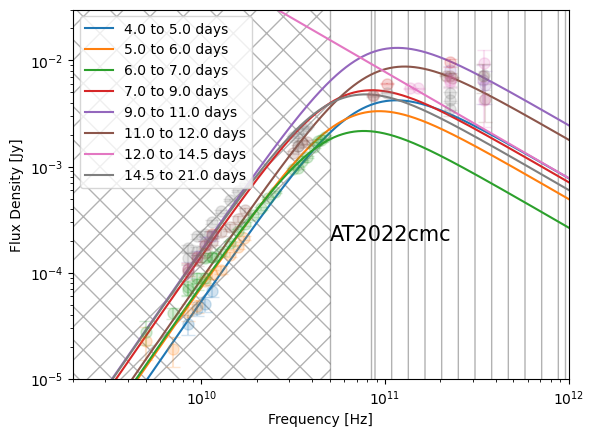

In [25]:

#bounds = np.arange(cmc.t.min(), cmc.t.max(), 5, dtype=int)
bounds = np.array([4, 5, 6, 7, 9, 11, 12, 14.5, 21]) #[0, 5, 10, 15, 20] # , 30, 100
fig, ax = plt.subplots()
plot_all_seds(cmc, bounds, ax=ax, n=2000, exact_bounds=False)

ax.text(5e10, 2e-4, 'AT2022cmc', fontsize=15)
ax.set_ylim(1e-5, 3e-2)
ax.set_xlim(2e9, 1e12)
fig.savefig('2022cmc-sed-plot.png', transparent=False, bbox_inches='tight')

### AT2019dsg

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:45<00:00, 43.88it/s]


[1.47481659e-03 1.36173649e+10] [1.44977443e-03 1.33057597e+10] [1.50668256e-03 1.38988921e+10]


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:32<00:00, 61.45it/s]


[1.58750772e-03 7.57876155e+09] [1.53893283e-03 3.16960677e+06] [1.31358005e+00 7.91121858e+09]


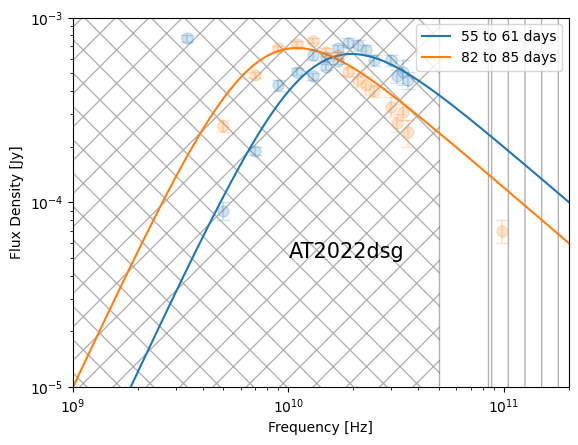

In [15]:
bounds = [55, 61, 82, 85] #, 161, 562]
fig, ax = plt.subplots()
plot_all_seds(dsg, bounds, ax=ax, exact_bounds=False, n=2000, plt_data=True)

ax.text(1e10, 5e-5, 'AT2019dsg', fontsize=15)
ax.set_ylim(1e-5, 1e-3)
ax.set_xlim(1e9, 2e11)
fig.savefig('2019dsg-sed-plot.png', transparent=False, bbox_inches='tight')

# Sw J1644

In [18]:
# let's only use the data from Berger

sw = SwJ1644_data[(SwJ1644_data.Citation=='Berger et al. (2012)') * (SwJ1644_data.t <= 40) * (SwJ1644_data.t >= 10)]
bounds = np.sort(np.unique([round(x,-1) for x in sw.t.unique()]))
bounds

array([10., 20., 30., 40.])

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:52<00:00, 38.34it/s]


[2.17143317e-02 1.21250040e+10] [2.12670248e-02 1.19774883e+10] [2.21889973e-02 1.22720363e+10]


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:49<00:00, 40.23it/s]


[2.95135698e-02 1.44404881e+10] [2.94756104e-02 1.44197129e+10] [2.95569464e-02 1.44599774e+10]


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:46<00:00, 42.61it/s]


[3.46627492e-02 1.11548449e+10] [3.46059734e-02 1.11350279e+10] [3.47373938e-02 1.11731688e+10]


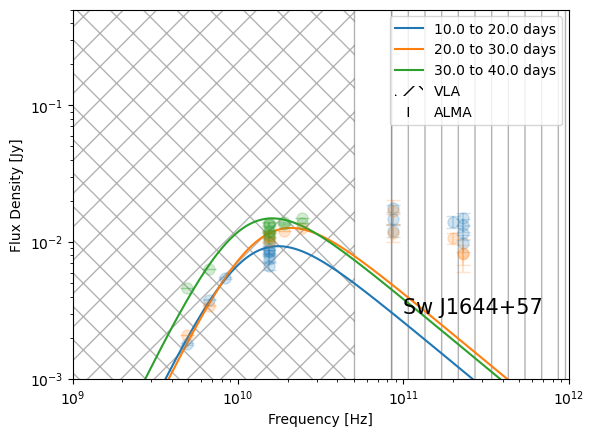

In [19]:
fig, ax = plt.subplots()
niter=2000
plot_all_seds(sw, bounds, ax=ax, n=niter, exact_bounds=False)
    
ax.legend()
ax.text(1e11, 3e-3, 'Sw J1644+57', fontsize=15)
ax.set_ylim(1e-3, 5e-1)
ax.set_xlim(1e9, 1e12)
fig.savefig('swj1644-sed-plot.png', transparent=False, bbox_inches='tight')